# Predicting Genre using attributes

## [ML-Checklist Pipeline.md](https://github.com/SaiKrishna1908/ML-Checklist/blob/main/Pipeline.md)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, mean_squared_error, r2_score,precision_score,recall_score
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

# playlists = os.path.join(input_path, 'playlists.csv')

# kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv

In [3]:
genre_df = pd.read_csv('Data/genres_v2.csv')
pd.set_option("display.max_columns", 50)

C:\Users\Matin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
genre_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
genre_df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
cat_attr = []
num_attr = []

def get_num_cat_data(data):
    
    for i in data.columns:
        if data[i].dtype == 'object':
            cat_attr.append(i)
        else:
            num_attr.append(i)
        

In [8]:
get_num_cat_data(genre_df)

In [9]:
print("categorical data is {}".format(cat_attr))
print("numerica data is {}".format(num_attr))

categorical data is ['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre', 'song_name', 'title']
numerica data is ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


In [10]:
def prune_categorical(data, threshold):
    
    result_columns = []
    
    for column in data.columns:
        if len(data[column].unique()) <= threshold:
            result_columns.append(column)
    return result_columns

In [11]:
pruned_cat_attr = prune_categorical(genre_df[cat_attr], 30)

In [12]:
genre_df[num_attr]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4


In [13]:
genre_df[pruned_cat_attr]

,type,genre
0,audio_features,Dark Trap
1,audio_features,Dark Trap
2,audio_features,Dark Trap
3,audio_features,Dark Trap
4,audio_features,Dark Trap
...,...,...
42300,audio_features,hardstyle
42301,audio_features,hardstyle
42302,audio_features,hardstyle
42303,audio_features,hardstyle


In [14]:
cat_attr

['type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'genre',
 'song_name',
 'title']

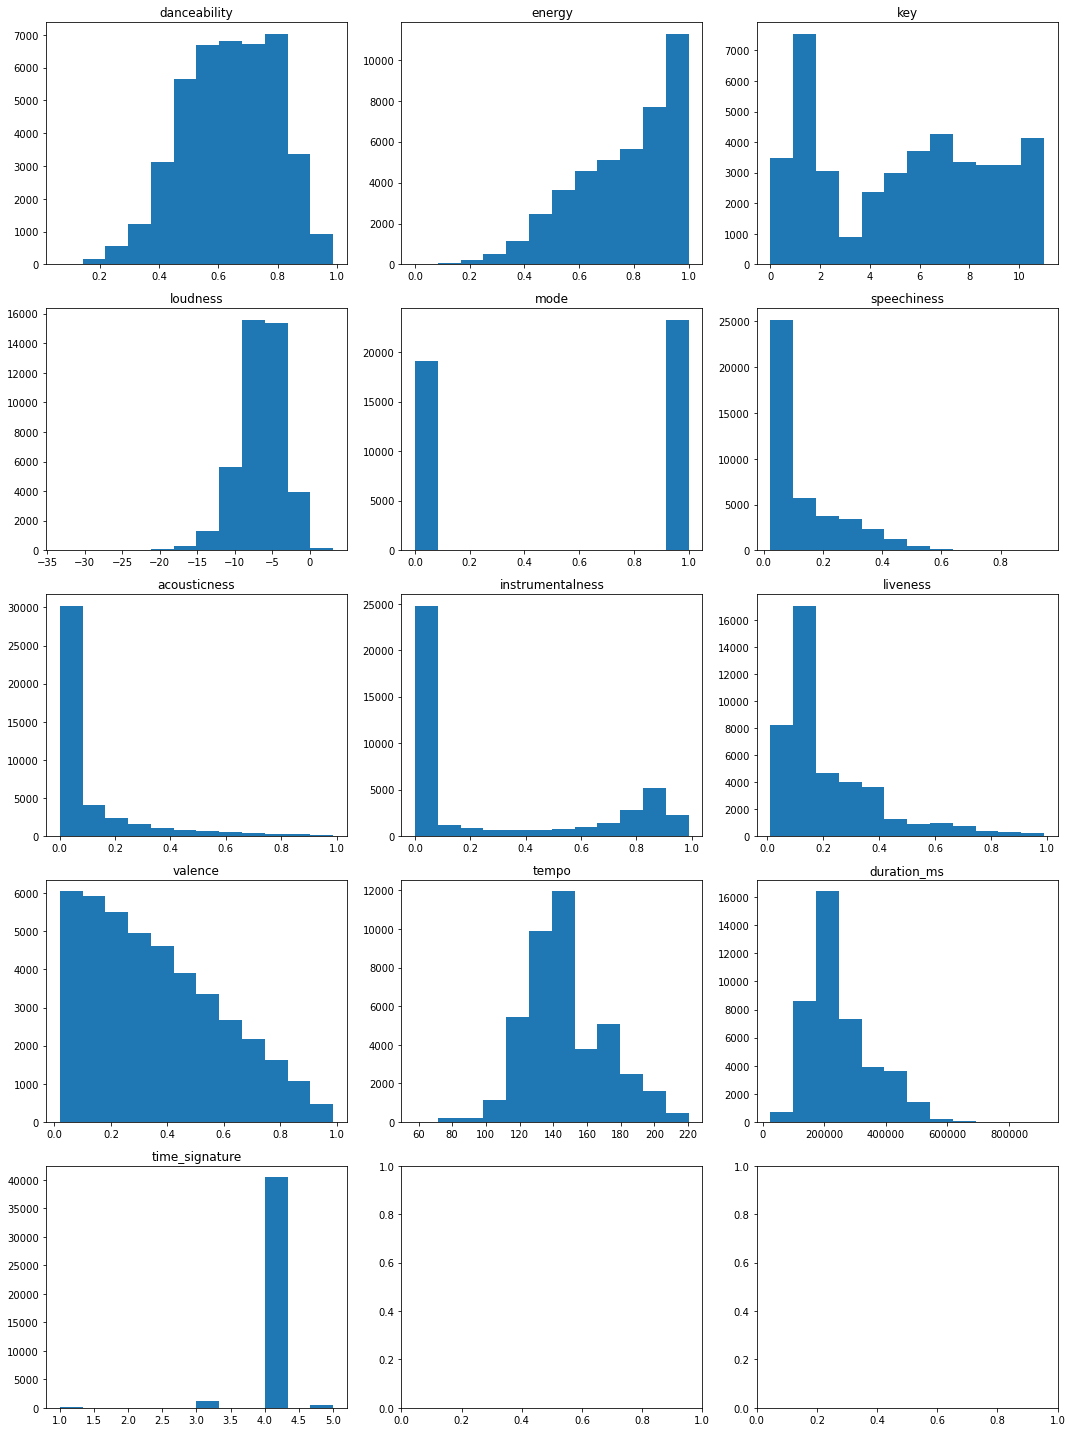

In [15]:
figure, ax = plt.subplots(nrows=5, ncols= 3, figsize=(15,20))
ax = ax.ravel()

for idx in range(len(num_attr)):
    ax[idx].hist(genre_df[num_attr].iloc[:,idx], bins =12)
    ax[idx].set_title(num_attr[idx])
figure.tight_layout()

<ipython-input-16-09e248fdab84>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout()


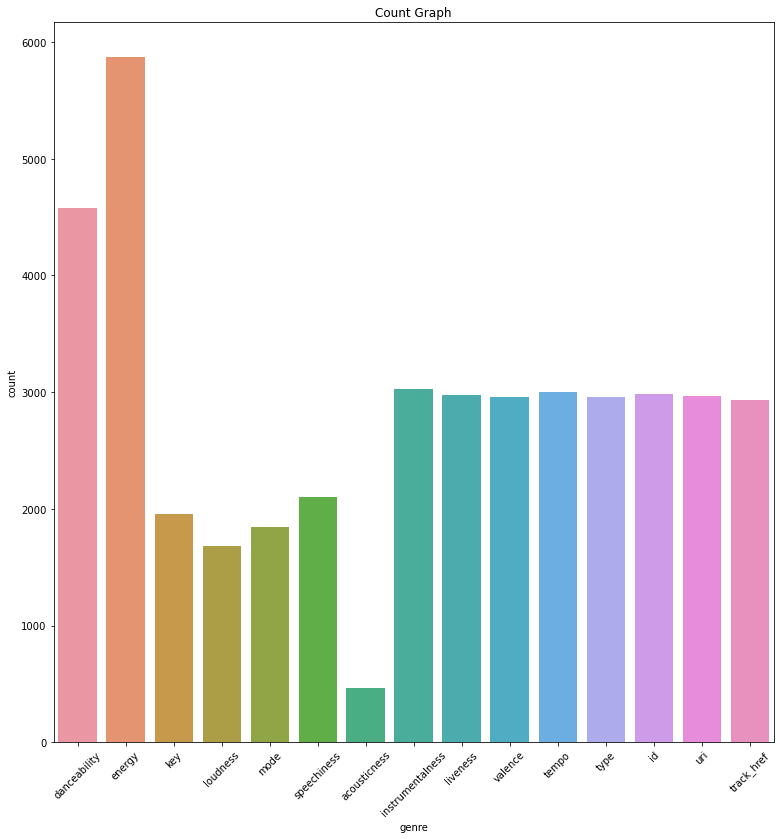

In [16]:
figure = plt.figure(figsize=(10,10))

axes = figure.add_axes([0,0,1,1])
sns.countplot(x='genre',data=genre_df, ax = axes)
axes.set_title('Count Graph')
axes.set_xticklabels(labels = genre_df.columns, rotation=45)
figure.tight_layout()

# Preprocessing

In [17]:
genre_df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
title               21525
dtype: int64

In [18]:
genre_df_prepared = genre_df.drop(['song_name', 'title','type'], axis=1)

In [19]:
genre_df_prepared[num_attr]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4


In [20]:
ord_enc = OrdinalEncoder()
genre_df_prepared['genre_num'] = ord_enc.fit_transform(genre_df_prepared[['genre']])

In [21]:
ord_enc.categories_[0]

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [22]:
mapped_labels = zip(range(len(ord_enc.categories_[0])), ord_enc.categories_[0])

In [23]:
for k,v in mapped_labels:
    print(" {}, {}".format(k,v))

 0, Dark Trap
 1, Emo
 2, Hiphop
 3, Pop
 4, Rap
 5, RnB
 6, Trap Metal
 7, Underground Rap
 8, dnb
 9, hardstyle
 10, psytrance
 11, techhouse
 12, techno
 13, trance
 14, trap


In [24]:
X = genre_df_prepared
y = genre_df_prepared['genre_num']

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_attr] = scaler.fit_transform(X[num_attr])

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

for train_index,test_index in split.split(X, y):
    strat_train_set = X.iloc[train_index]
    strat_test_set = X.iloc[test_index]

In [27]:
strat_train_set.size, strat_test_set.size

(643036, 160759)

In [28]:
x_train, y_train = strat_train_set[num_attr], strat_train_set['genre_num']
x_test, y_test = strat_test_set[num_attr], strat_test_set['genre_num']

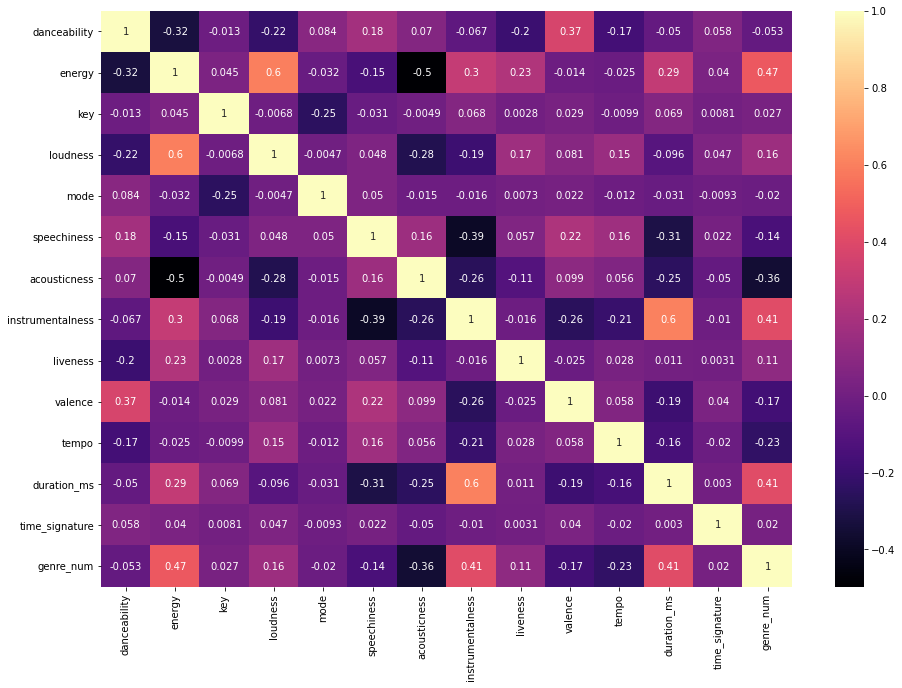

In [29]:
figure = plt.figure()

axes = figure.add_axes([0,0,2,2])
sns.heatmap(genre_df_prepared.corr(),annot=True,cmap='magma')

In [30]:
genre_df_prepared['time_signature'].min(), genre_df_prepared['time_signature'].max()

(-11.077728377101748, 3.82882162864878)

In [31]:
input_features = ['energy', 'loudness','acousticness','instrumentalness','duration_ms']

# Data Modeling

In [32]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=15)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(classification_report(y_true = y_test,y_pred = y_pred))
print(f1_score(y_true =y_test, y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         0.0       0.41      0.39      0.40       916
         1.0       0.52      0.54      0.53       336
         2.0       0.34      0.36      0.35       606
         3.0       0.18      0.14      0.16        92
         4.0       0.44      0.33      0.37       370
         5.0       0.29      0.25      0.27       420
         6.0       0.24      0.19      0.21       391
         7.0       0.38      0.44      0.40      1175
         8.0       0.95      0.95      0.95       593
         9.0       0.81      0.85      0.83       587
        10.0       0.88      0.89      0.89       592
        11.0       0.85      0.86      0.86       595
        12.0       0.80      0.83      0.81       591
        13.0       0.78      0.81      0.80       600
        14.0       0.79      0.75      0.77       597

    accuracy                           0.60      8461
   macro avg       0.58      0.57      0.57      8461
weighted avg       0.60   

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1,max_depth=2, n_estimators=50)
xgb.fit(x_train, y_train)

C:\Users\Matin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
y_pred = xgb.predict(x_test)
# print(f1_score(y_true =y_test, y_pred=y_pred))
print(r2_score(y_true =y_test, y_pred=y_pred))

0.4344017836612897


In [35]:
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print(classification_report(y_true = y_test,y_pred = y_pred))


              precision    recall  f1-score   support

         0.0       0.42      0.29      0.34       916
         1.0       0.47      0.25      0.33       336
         2.0       0.29      0.44      0.35       606
         3.0       0.00      0.00      0.00        92
         4.0       0.22      0.13      0.16       370
         5.0       0.24      0.09      0.13       420
         6.0       0.37      0.03      0.06       391
         7.0       0.42      0.56      0.48      1175
         8.0       0.69      0.80      0.74       593
         9.0       0.42      0.50      0.46       587
        10.0       0.85      0.67      0.75       592
        11.0       0.68      0.76      0.72       595
        12.0       0.69      0.80      0.74       591
        13.0       0.52      0.69      0.59       600
        14.0       0.59      0.68      0.63       597

    accuracy                           0.51      8461
   macro avg       0.46      0.45      0.43      8461
weighted avg       0.49   

In [36]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
print(classification_report(y_true = y_test,y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.35      0.40      0.37       916
         1.0       0.51      0.56      0.53       336
         2.0       0.35      0.37      0.36       606
         3.0       0.15      0.08      0.10        92
         4.0       0.36      0.29      0.32       370
         5.0       0.27      0.20      0.23       420
         6.0       0.28      0.15      0.19       391
         7.0       0.38      0.38      0.38      1175
         8.0       0.89      0.91      0.90       593
         9.0       0.63      0.74      0.68       587
        10.0       0.77      0.86      0.82       592
        11.0       0.76      0.79      0.78       595
        12.0       0.76      0.84      0.80       591
        13.0       0.69      0.64      0.66       600
        14.0       0.71      0.68      0.70       597

    accuracy                           0.56      8461
   macro avg       0.52      0.53      0.52      8461
weighted avg       0.55   

In [37]:
def get_label_prediction_score(x_train_l, y_train_l, x_test_l, y_test_l):
    
    x_train_l.reset_index(drop=True, inplace=True)
    y_train_l.reset_index(drop=True, inplace=True)
    x_test_l.reset_index(drop = True, inplace=True)
    y_test_l.reset_index(drop = True, inplace=True)
    
    result = []
    for i in y_train_l.unique():        
        
        dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
        
        print(i)
        num_train_y = np.zeros(y_train_l.shape)            
        num_train_y[y_train_l[y_train_l == i].index] = 1
        
        num_test_y = np.zeros(y_test_l.shape)
        num_test_y[y_test_l[y_test_l == i].index] = 1
        
        dec_tree.fit(x_train_l, num_train_y)
        
        
        y_train_pred = dec_tree.predict(x_train_l)
        y_test_pred = dec_tree.predict(x_test_l)
        
        train_score = f1_score(y_true = num_train_y, y_pred = y_train_pred)
        test_score = f1_score(y_true =num_test_y, y_pred=y_test_pred,average='macro')
        
        
        print("{} train score is {}".format(i, train_score))
        print("{} train score is {}".format(i, test_score))

In [38]:
result = get_label_prediction_score(x_train,y_train,x_test, y_test)

13.0
13.0 train score is 0.8360352965319106
13.0 train score is 0.8844547416264451
1.0
1.0 train score is 0.73932863655201
1.0 train score is 0.7417227650723976
9.0
9.0 train score is 0.8806502775574941
9.0 train score is 0.911343439434752
6.0
6.0 train score is 0.4464037122969837
6.0 train score is 0.5652804983783437
11.0
11.0 train score is 0.9149847094801223
11.0 train score is 0.9116641714222475
10.0
10.0 train score is 0.9475935828877007
10.0 train score is 0.9436075224083402
2.0
2.0 train score is 0.5212121212121212
2.0 train score is 0.6659361015677255
12.0
12.0 train score is 0.9085520745131245
12.0 train score is 0.8980627834689391
14.0
14.0 train score is 0.8290502793296091
14.0 train score is 0.8674646169885392
5.0
5.0 train score is 0.255127563781891
5.0 train score is 0.5384952453771942
7.0
7.0 train score is 0.4358266629864754
7.0 train score is 0.6287528323881124
4.0
4.0 train score is 0.4708912931478619
4.0 train score is 0.68744766783234
0.0
0.0 train score is 0.481329

In [39]:
removal_list = [1,6,2,5,4,7,0,3]

In [40]:
train_idxs = y_train[y_train > 7].index
test_idxs = y_test[y_test > 7].index

In [41]:
np.array(y_train.iloc[list(train_idxs)]).reshape(1,-1).shape

(1, 16625)

In [42]:
def train_selected_features(train_idx, test_idx):
    
    slct_x_train = x_train.iloc[list(train_idx)]
    slct_x_test = x_test.iloc[list(test_idx)]
    
    slct_y_train = y_train.iloc[list(train_idx)]
    slct_y_test = y_test.iloc[list(test_idx)]
    
    print("{}  {} {} {}".format(slct_x_train.shape,slct_x_test.shape, slct_y_train.shape, slct_y_test.shape))
    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=15)
    tree.fit(slct_x_train, slct_y_train)
    y_pred = tree.predict(slct_x_test)
    print(classification_report(y_true = slct_y_test,y_pred = y_pred))
    print(f1_score(y_true =slct_y_test, y_pred=y_pred, average='macro'))

In [43]:
train_selected_features(train_idxs, test_idxs)

(16625, 13)  (4155, 13) (16625,) (4155,)
              precision    recall  f1-score   support

         8.0       1.00      1.00      1.00       593
         9.0       0.90      0.90      0.90       587
        10.0       0.89      0.89      0.89       592
        11.0       0.91      0.89      0.90       595
        12.0       0.80      0.83      0.81       591
        13.0       0.87      0.87      0.87       600
        14.0       0.89      0.87      0.88       597

    accuracy                           0.89      4155
   macro avg       0.89      0.89      0.89      4155
weighted avg       0.89      0.89      0.89      4155

0.8934008761472674


In [44]:
for k,v in mapped_labels:
    print(" {}, {}".format(k,v))